In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the datasets
##### bechdel, movies_metadata and links

In [6]:
bechdeldf = pd.read_csv('csvdata/bechdel/movies.csv')

In [8]:
movies_metadatadf = pd.read_csv('csvdata/tmdb/movies_metadata.csv')
#low memory flag on for better machines (nice touch, i mindlessly ran every code cell anyway)
#movies_metadatadf = pd.read_csv('csvdata/tmdb/movies_metadata.csv',low_memory=False)

C:\Users\MAHE\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#Loading the tmdb credits dataset
creditsdf = pd.read_csv('csvdata/tmdb/credits.csv')

In [10]:
# Loading the tmdb links dataset
linksdf = pd.read_csv('csvdata/tmdb/links.csv')

In [11]:
#bechdeldf.head()

In [12]:
#creditsdf.head()

In [13]:
#linksdf.head()

In [14]:
#Converting the Imdb Id column to integer type column names imdbnew
linksdf["imdbnew"]=linksdf["imdbId"].astype(int)
#linksdf.head()

In [15]:
bechdeldf["imdbtemp"]=bechdeldf["imdb"].str.slice(2) #slicing the id to remove tt and making it a separate column called imdbtemp

In [16]:
bechdeldf["imdbasint"]=bechdeldf["imdbtemp"].astype(int) #converting the new column to integer

In [17]:
#bechdeldf.head()
#bechdeldf.dtypes

In [18]:
bechdeldf.rename(columns={'imdbnew':'imdbfin'},inplace=True)
linksdf.rename(columns={'imdbnew':'imdbfin'},inplace=True)

In [19]:
#bechdeldf.drop("period code", axis = 1,inplace=True)

In [20]:
#bechdeldf.drop("decade code", axis = 1, inplace=True)
#removing the columns we don't need

In [21]:
#bechdeldf.head()

In [22]:
#linksdf.dtypes

In [23]:
#bechdeldf.dtypes

In [24]:
bechdel_links = pd.merge(bechdeldf, linksdf, left_on='imdbasint',right_on='imdbfin', how='left') #joined the two datasets

In [25]:
#bechdel_links.head()

In [26]:
#Calculating the number of passing/failing movies on basis of the bechdel test
passcounts=bechdel_links.binary.value_counts()["PASS"]
failcounts=bechdel_links.binary.value_counts()["FAIL"]
print("The no. of movies that passed the bechdel test are:", passcounts)
print("The no. of movies that failed the bechdel test are:", failcounts)
print("The sample size of the dataset considered was: ", bechdel_links.shape[0])
print("Percentage of movies that pass the bechdel test are: ", (passcounts/bechdel_links.shape[0]) * 100 )

The no. of movies that passed the bechdel test are: 803
The no. of movies that failed the bechdel test are: 991
The sample size of the dataset considered was:  1794
Percentage of movies that pass the bechdel test are:  44.760312151616496


binary  year
FAIL    1971     5
        1972     2
        1973     4
        1974     5
        1975     5
                ..
PASS    2009    42
        2010    61
        2011    53
        2012    37
        2013    46
Name: imdb, Length: 85, dtype: int64


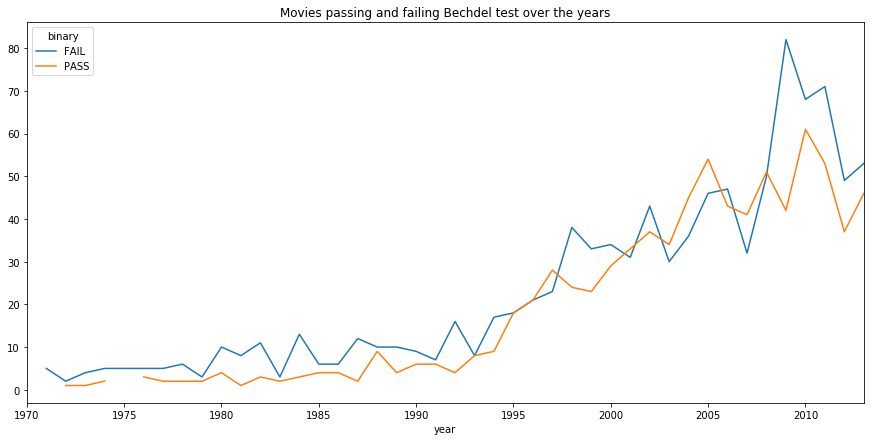

In [27]:
count_series = bechdel_links.groupby(['binary', 'year'])['imdb'].count() # give a better variable name
#making separate dataframes for movies passing and failing
print(count_series)
# plotting the passing and failing number of movies over time
fig, ax = plt.subplots(figsize=(15,7))
title = "Movies passing and failing Bechdel test over the years"
count_series.unstack('binary').plot(kind='line',ax=ax,title = title)

#### This plot tells us only one thing, that the number of movies produced in a year has gone up. What we are really looking for, is the **proportion** of movies that have passed/failed

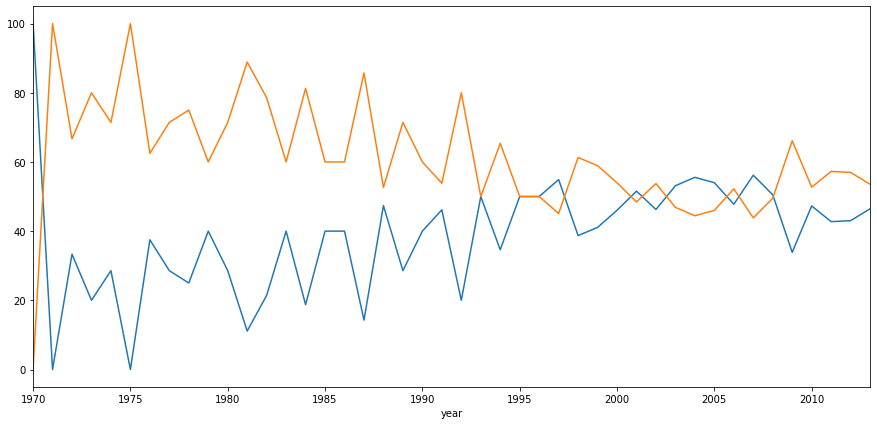

In [28]:
unstacked_movies = count_series.unstack('binary')  # Failing movies
unstacked_movies['FAIL'] = unstacked_movies['FAIL'].fillna(0)
unstacked_movies['PASS'] = unstacked_movies['PASS'].fillna(0)
unstacked_movies['Pass Percentage'] = (unstacked_movies.PASS * 100 ) / (unstacked_movies.PASS + unstacked_movies.FAIL)
unstacked_movies['Fail Percentage'] = (unstacked_movies.FAIL * 100 ) / (unstacked_movies.PASS + unstacked_movies.FAIL)
# plotting the passing and failing number of movies over time
fig, ax = plt.subplots(figsize=(15,7))
title = "Pass percentage of movies Bechdel test over the years"
unstacked_movies['Pass Percentage'].plot(kind='line', ax=ax)
unstacked_movies['Fail Percentage'].plot(kind='line', ax=ax)
## if we look at this plot with fail percentage also, it looks like the percentage of movies that fail over the
## years has gone down and percentage of movies that have passed, have gone up. Now, it has converged to 50
## Does that mean we live in better times?
## (We don't really need the fail percentage plot but i added it for dramatics)

In [29]:
#bechdel_links.head()

In [30]:
#movies_metadatadf.head()

In [31]:
movies_metadatadf["imdbtemp"]=movies_metadatadf["imdb_id"].str.slice(2) 
movies_metadatadf.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdbtemp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,0114709
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,0113497
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,0113228
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,0114885
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,0113041


In [32]:
movies_metadatadf["imdbtemp"].fillna(0,inplace=True)      #Filling all the na values with 0
movies_metadatadf.drop([19730,29503,35587],inplace=True)  #These values were got from doing a check on the empty values 
                                                          #i.e. '' values in the imdbtemp column, total rows were just 3 so were droppped 

In [33]:
movies_metadatadf["imdbasint"]=movies_metadatadf["imdbtemp"].astype(int)
#i can't convert imdb to int for some reason. they are all obviously string. it worked before but it's not now.
# i can't merge till i do this
# TASK DONE!

In [34]:
movies_metadatadf["imdbtemp"].isna().value_counts() #checking if there are any na values

False    45463
Name: imdbtemp, dtype: int64

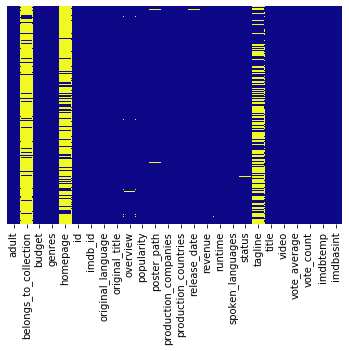

In [35]:
sns.heatmap(movies_metadatadf.isnull(), yticklabels = False, cbar = False, cmap = 'plasma') #to check for null values

In [36]:
movies_metadatadf.drop(["belongs_to_collection"],axis=1,inplace=True)

In [37]:
movies_metadatadf.drop(["tagline"],axis=1,inplace=True)

In [38]:
movies_metadatadf.drop(["homepage"],axis=1,inplace=True)

In [39]:
movies_metadatadf.drop(["poster_path"],axis=1,inplace=True)

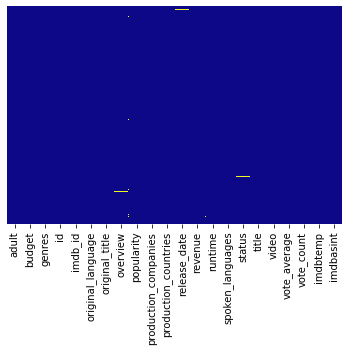

In [40]:
sns.heatmap(movies_metadatadf.isnull(), yticklabels = False, cbar = False, cmap = 'plasma') #to check for n

In [41]:
movies_metadatadf.dtypes

adult                    object
budget                   object
genres                   object
id                       object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
imdbtemp                 object
imdbasint                 int32
dtype: object

In [42]:
movies_metadatadf.head(10)
#look at the budget and revenue column. How are they 0

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,imdbtemp,imdbasint
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,0114709,114709
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,0113497,113497
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,0113228,113228
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0,0114885,114885
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0,0113041,113041
5,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,False,7.7,1886.0,0113277,113277
6,False,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.67728,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,False,6.2,141.0,0114319,114319
7,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Tom and Huck,False,5.4,45.0,0112302,112302
8,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Sudden Death,False,5.5,174.0,0114576,114576
9,False,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686,"[{'name': 'United Artists', 'id': 60}, {'name'...",...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,GoldenEye,False,6.6,1194.0,0113189,113189


In [43]:
(movies_metadatadf[movies_metadatadf.budget == 0]).shape
#number of movies with 0 budget

(0, 22)

In [44]:
(movies_metadatadf[movies_metadatadf.revenue == 0]).shape #number of movies with 0 budget
#what's that 38052???
#I think there are a lot of missing values for revenues we need to think of something else to do here. 
#i'm cleaning this dataframe so that we can join it with bechdel_links and 
#plot a graph between popularity and passing/failing

(38052, 22)

In [45]:
bechdel_links.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,...,domgross_2013$,intgross_2013$,period code,decade code,imdbtemp,imdbasint,movieId,imdbId,tmdbId,imdbfin
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,...,25682380.0,42195766.0,1.0,1.0,1711425,1711425,100507.0,1711425.0,107811.0,1711425.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,...,13611086.0,41467257.0,1.0,1.0,1343727,1343727,96737.0,1343727.0,49049.0,1343727.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,...,53107035.0,158607035.0,1.0,1.0,2024544,2024544,105844.0,2024544.0,76203.0,2024544.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,...,75612460.0,132493015.0,1.0,1.0,1272878,1272878,103883.0,1272878.0,136400.0,1272878.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,...,95020213.0,95020213.0,1.0,1.0,0453562,453562,101895.0,453562.0,109410.0,453562.0


In [63]:
bechdel_links_mmd = pd.merge(bechdel_links, movies_metadatadf, left_on='imdbasint',right_on='imdbtemp', how='left') #joined the two datasets

In [64]:

pd.set_option('display.max_columns', None)

In [65]:
bechdel_links_mmd.head(1000)

,year,imdb,title_x,test,clean_test,binary,budget_x,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,imdbtemp_x,imdbasint_x,movieId,imdbId,tmdbId,imdbfin,adult,budget_y,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title_y,video,vote_average,vote_count,imdbtemp_y,imdbasint_y
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0,1711425,1711425,100507.0,1711425.0,107811.0,1711425.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0,1343727,1343727,96737.0,1343727.0,49049.0,1343727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0,2024544,2024544,105844.0,2024544.0,76203.0,2024544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0,1272878,1272878,103883.0,1272878.0,136400.0,1272878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0,0453562,453562,101895.0,453562.0,109410.0,453562.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2004,tt0293508,The Phantom of the Opera,men-disagree,men,FAIL,55000000,51225796.0,158225796.0,2004FAIL,67825608,63171287.0,195122925.0,3.0,2.0,0293508,293508,30816.0,293508.0,9833.0,293508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2004,tt0338348,The Polar Express,notalk,notalk,FAIL,170000000,194949659.0,319049659.0,2004FAIL,209642789,240410531.0,393449767.0,3.0,2.0,0338348,338348,8965.0,338348.0,5255.0,338348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2004,tt0368933,The Princess Diaries 2: Royal Engagement,ok,ok,PASS,45000000,95149435.0,122071435.0,2004PASS,55493679,117337605.0,150537624.0,3.0,2.0,0368933,368933,8808.0,368933.0,11130.0,368933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2004,tt0327162,The Stepford Wives,ok,ok,PASS,100000000,59475623.0,96221971.0,2004PASS,123319288,73344915.0,118660249.0,3.0,2.0,0327162,327162,8373.0,327162.0,9890.0,327162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


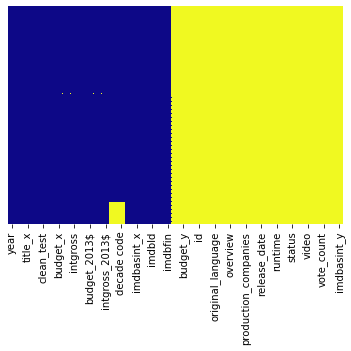

In [48]:
sns.heatmap(bechdel_links_mmd.isnull(), yticklabels = False, cbar = False, cmap = 'plasma') #to check for n

In [113]:
#wtf.